In [1]:
import pandas as pd
import numpy as np

### Pull from Wikipedia

In [2]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/100_metres")
mens100m = dfs[5]
women100m = dfs[6]

In [3]:
mens100m['Time'] = mens100m['Time'].str.replace("[A]", "", regex=False).str.replace("h", "", regex=False)
mens100m['Time'] = pd.to_numeric(mens100m['Time'])

In [4]:
women100m['Time'] = women100m['Time'].str.replace("[A]", "", regex=False).str.replace("h", "", regex=False).str.replace("[a]", "", regex=False)
women100m['Time'] = pd.to_numeric(women100m['Time'])

### Plot the Data

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
mens100m['Name'] = mens100m['Year'].astype('str') + ": " + mens100m['Athlete']
women100m['Name'] = women100m['Year'].astype('str') + ": " + women100m['Athlete']

In [7]:
import seaborn as sns
color_pal = sns.color_palette()

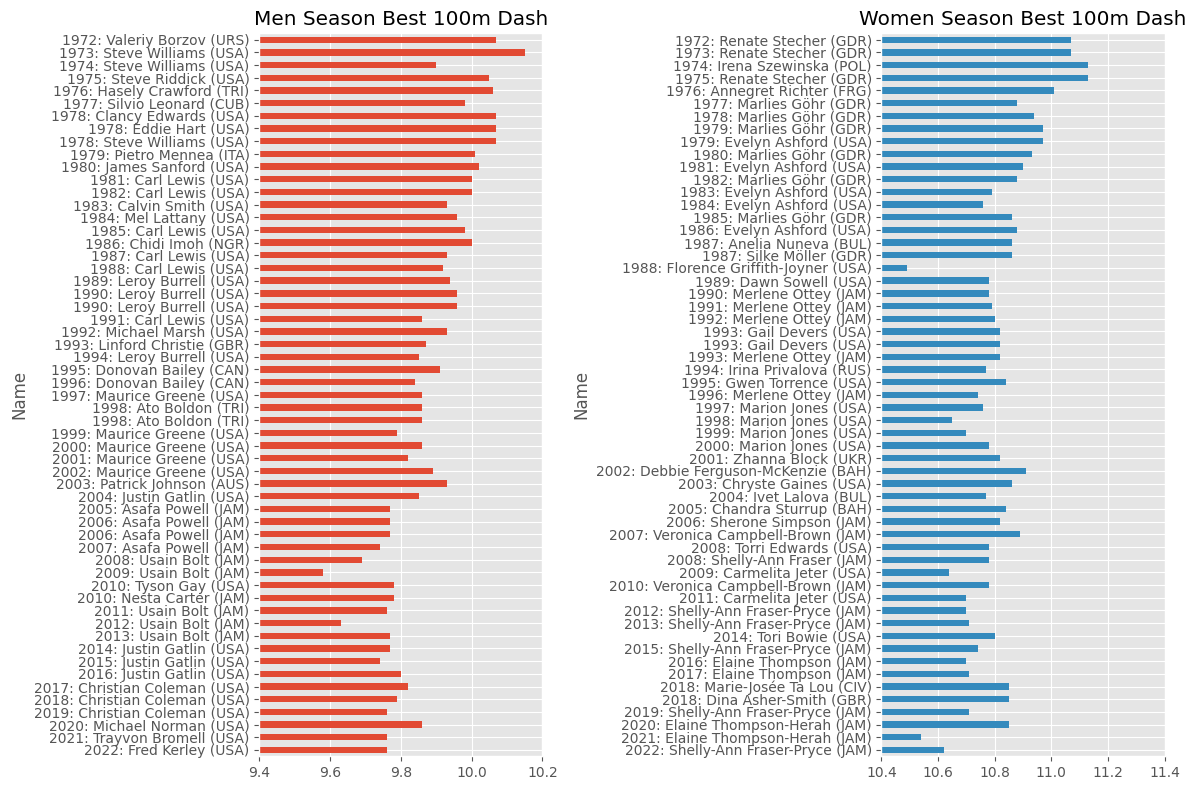

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

mens100m.sort_values('Year', ascending=False).set_index('Name')['Time'].plot(kind='barh', ax=axs[0])
ax=axs[0].set_xlim(9.4, 10.2)
ax=axs[0].set_title("Men Season Best 100m Dash")

women100m.sort_values('Year', ascending=False).set_index('Name')['Time'].plot(kind='barh', ax=axs[1], color=color_pal[1])
ax=axs[1].set_xlim(10.4, 11.4)
ax=axs[1].set_title("Women Season Best 100m Dash")
plt.tight_layout()
plt.show()

In [9]:
mens100m.to_csv("mens100m.csv", index=False)
women100m.to_csv("women100m.csv", index=False)